Question 1:

In [1]:


#python locAL.py <seq file> -m <match> -s <mismatch> -d <indel> -a
#python locAL.py testseqs.txt -m +1 -s -1 -d -1 -a

import sys, getopt, numpy

arguments = ["locAL", "p1seqs.txt", "-m", "1", "-s","-10", "-d", "-1", "-a"]


file = arguments[1]
matchScore = int(arguments[3])
mismatchScore =  int(arguments[5])
indel = int(arguments[7])
findA = False
if '-a' in arguments: 
	findA = True
	#print('found -a')

print ('Number of arguments:', len(arguments), 'arguments.')
print ('Argument List:', str(arguments))
print ('file:', str(file))
print ('matchScore:', str(matchScore))
print ('mismatchScore:', str(mismatchScore))
print ('indel:', str(indel))
print ('findA:', str(findA))

Number of arguments: 9 arguments.
Argument List: ['locAL', 'p1seqs.txt', '-m', '1', '-s', '-10', '-d', '-1', '-a']
file: p1seqs.txt
matchScore: 1
mismatchScore: -10
indel: -1
findA: True


In [20]:
data = open(file, "r")


check = False
counter = 0
seq1 = []
seq2 = []
for line in data:
	if 'seq' in line:
		check = True
	elif check == True and counter == 0:
		for char in line:
			if char != '\n':
				seq1.append(char)

		counter +=1
	elif check == True and counter == 1:
		for char in line:
			if char != '\n':
				seq2.append(char)


In [21]:
#to find the max score

#initialize all them

#vert = insertion
vert = numpy.empty((len(seq2)+1, len(seq1)+1))
vert[:] = 0

d = 1
while d < len(vert):
	vert[d][0] = indel*d
	d+=1

d=1
while d < len(vert[0]):
	vert[0][d] = -float("inf")
	d+=1

vert [0][0] = 0


#hori = deletion
hori = numpy.empty((len(seq2)+1, len(seq1)+1))
hori[:] = 0
d=1
while d < len(hori[0]):
	hori[0][d] = indel*d
	d+=1
    
d=1
while d < len(hori):
	hori[d][0] = -float("inf")
	d+=1
hori[0][0]=0

#diag = match or mismatch
diag = numpy.empty((len(seq2)+1, len(seq1)+1))
diag[:] = 0
d=1
while d < len(diag[0]):
	diag[0][d] = indel*d
	d+=1
d=1
while d < len(diag):
	diag[d][0] = indel*d
	d+=1
diag [0][0] = 0

#score for scorekeeping
score = numpy.empty((len(seq2)+1, len(seq1)+1))
score[:] = numpy.NAN

d=1
while d < len(score[0]):
	score[0][d] = 0
	d+=1
d=1
while d < len(score):
	score[d][0] = 0
	d+=1
score [0][0] = 0

#1 = Vert, 2 = Horiz, 3 = diag

dire = numpy.empty((len(seq2)+1, len(seq1)+1))
d=1
while d < len(dire[0]):
	dire[0][d] = 2
	d+=1
d=1
while d < len(dire):
	dire[d][0] = 1
	d+=1
    
print ("Vertical")
print (vert)

print ("Horizontal")
print (hori)

print ("Diagonal")
print (diag)

print ("Score")
print (score)

print ("Direction")
print (dire)


#run the script until we good

Vertical
[[    0.   -inf   -inf ...,   -inf   -inf   -inf]
 [   -1.     0.     0. ...,     0.     0.     0.]
 [   -2.     0.     0. ...,     0.     0.     0.]
 ..., 
 [ -998.     0.     0. ...,     0.     0.     0.]
 [ -999.     0.     0. ...,     0.     0.     0.]
 [-1000.     0.     0. ...,     0.     0.     0.]]
Horizontal
[[    0.    -1.    -2. ...,  -998.  -999. -1000.]
 [  -inf     0.     0. ...,     0.     0.     0.]
 [  -inf     0.     0. ...,     0.     0.     0.]
 ..., 
 [  -inf     0.     0. ...,     0.     0.     0.]
 [  -inf     0.     0. ...,     0.     0.     0.]
 [  -inf     0.     0. ...,     0.     0.     0.]]
Diagonal
[[    0.    -1.    -2. ...,  -998.  -999. -1000.]
 [   -1.     0.     0. ...,     0.     0.     0.]
 [   -2.     0.     0. ...,     0.     0.     0.]
 ..., 
 [ -998.     0.     0. ...,     0.     0.     0.]
 [ -999.     0.     0. ...,     0.     0.     0.]
 [-1000.     0.     0. ...,     0.     0.     0.]]
Score
[[  0.   0.   0. ...,   0.   0.   0.]
 [ 

In [22]:
(1==1)==1

True

In [23]:

# here we going to loop through the whole thing and go from top left to bottom right


#let's make a variable to keep track of the biggest score value:
maxScore = 0
bestLoc = (0,0)
# we want to iterate 1-10 in the 3 matrices. This is the nested for loop
i = 1
while i < len(diag):
    j=1
    while j < len(diag[i]):
        #print ('current i and j: ', i , ' ', j)
        #we gotta manipulate each matrix we're working with
        
        #Vertical
        a = vert[i-1][j]
        b = diag[i-1][j]
        
        if a>=b:
            vert[i][j] = a + indel
        elif b>=a:
            vert[i][j] = b + indel
        
        
        #Horizontal
        a = hori[i][j-1]
        b = diag[i][j-1]
        
        if a>=b:
            hori[i][j] = a + indel
        elif b>=a:
            hori[i][j] = b + indel

        #diag
        
        
        a = vert[i][j]
        b = hori[i][j]
        
        #print((seq1[j-1],seq2[i-1]))
        
        if(int(seq1[j-1]==seq2[i-1]) ==0):
            cScore = mismatchScore
        else:
            cScore = matchScore

        c = diag[i-1][j-1] + cScore
        
        
        if a>=b and a>=c:
            dire[i][j] = "1"
            diag[i][j]=a
        if b>=a and b>=c:
            dire[i][j] = "2"
            diag[i][j]=b
        if c>=a and c>=b:
            dire[i][j] = "3"
            diag[i][j]=c 
        if diag[i][j]<0:
            dire[i][j] = 0
            diag[i][j] =0
        
        if(diag[i][j] >= maxScore):
            maxScore = diag[i][j]
            bestLoc = (i,j)
            
        j+=1

    i+=1

print('vertical: ')
print(vert)
print('horizontal: ')
print(hori)
print('diagonal: ')
print(diag)

print('Directional: ')
print(dire)


print('best: ', maxScore)
print(bestLoc)


# run this if -a is on
#reset directional borders to zero:
d=1
while d < len(dire[0]):
	dire[0][d] = 0
	d+=1
d=1
while d < len(dire):
	dire[d][0] = 0
	d+=1


# let's write a function to find the local alignment


ali1 = "" 
#print(seq1)
#print(seq1[bestLoc[1]-1])

#remember seq2 is the y value but is presented first in the coordinates
ali2 = ""
#print(seq2)
#print(seq2[bestLoc[0]-1])




k = 0
current = bestLoc

while k == 0:
    #print ("currentLoc: ", bestLoc, " currentDire ",dire[bestLoc])
    
    #on zero we stop
    
    if dire[bestLoc] == 0:
        print("stopped at: ", bestLoc)
        k=1
    #on 1 we go up. so i changes but j stays the same
    elif dire[bestLoc] == 1:
        bestLoc = (bestLoc[0]-1, bestLoc[1])
        ali1 = ali1 + "-"
        ali2 = ali2 + str(seq2[bestLoc[0]])
    #on 2 we go left so j changes but i stays constant
    elif dire[bestLoc] == 2:
        bestLoc = (bestLoc[0], bestLoc[1]-1)
        ali2 = ali2 + "-"
        ali1 = ali1 = ali1 + str(seq1[bestLoc[1]])
    #on 3 both change, yay!
    elif dire[bestLoc] == 3:
        bestLoc = (bestLoc[0]-1, bestLoc[1]-1)
        ali1 = ali1 + str(seq1[bestLoc[1]])
        ali2 = ali2 + str(seq2[bestLoc[0]])


print('Best Score: ', maxScore)
print ('Length: ', len(ali1))
print (ali1[::-1])
print (ali2[::-1])



vertical: 
[[  0.00000000e+00             -inf             -inf ...,             -inf
              -inf             -inf]
 [ -1.00000000e+00  -2.00000000e+00  -3.00000000e+00 ...,  -9.99000000e+02
   -1.00000000e+03  -1.00100000e+03]
 [ -2.00000000e+00   0.00000000e+00  -1.00000000e+00 ...,  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00]
 ..., 
 [ -9.98000000e+02  -1.00000000e+00   0.00000000e+00 ...,   1.08000000e+02
    1.10000000e+02   1.09000000e+02]
 [ -9.99000000e+02  -1.00000000e+00  -1.00000000e+00 ...,   1.07000000e+02
    1.09000000e+02   1.11000000e+02]
 [ -1.00000000e+03  -1.00000000e+00  -1.00000000e+00 ...,   1.09000000e+02
    1.08000000e+02   1.10000000e+02]]
horizontal: 
[[  0.00000000e+00  -1.00000000e+00  -2.00000000e+00 ...,  -9.98000000e+02
   -9.99000000e+02  -1.00000000e+03]
 [            -inf  -2.00000000e+00   0.00000000e+00 ...,  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00]
 [            -inf  -3.00000000e+00  -1.00000000e+00 ...,   0.00000000e+

Question 2


In [2]:
#Let's rewrite the above program into a function so we can input our randomly generated sequences
print ("done")

def getLocAL(seq1, seq2, matchS, mismatchS, indel):
    matchScore = matchS
    mismatchScore =  mismatchS
    indel = int(indel)
    
    
    vert = numpy.empty((len(seq2)+1, len(seq1)+1))
    vert[:] = 0

    d = 1
    while d < len(vert):
        vert[d][0] = indel*d
        d+=1

    d=1
    while d < len(vert[0]):
        vert[0][d] = -float("inf")
        d+=1

    vert [0][0] = 0


    #hori = deletion
    hori = numpy.empty((len(seq2)+1, len(seq1)+1))
    hori[:] = 0
    d=1
    while d < len(hori[0]):
        hori[0][d] = indel*d
        d+=1

    d=1
    while d < len(hori):
        hori[d][0] = -float("inf")
        d+=1
    hori[0][0]=0

    #diag = match or mismatch
    diag = numpy.empty((len(seq2)+1, len(seq1)+1))
    diag[:] = 0
    d=1
    while d < len(diag[0]):
        diag[0][d] = indel*d
        d+=1
    d=1
    while d < len(diag):
        diag[d][0] = indel*d
        d+=1
    diag [0][0] = 0

    #score for scorekeeping
    score = numpy.empty((len(seq2)+1, len(seq1)+1))
    score[:] = numpy.NAN

    d=1
    while d < len(score[0]):
        score[0][d] = 0
        d+=1
    d=1
    while d < len(score):
        score[d][0] = 0
        d+=1
    score [0][0] = 0

    #1 = Vert, 2 = Horiz, 3 = diag

    dire = numpy.empty((len(seq2)+1, len(seq1)+1))
    d=1
    while d < len(dire[0]):
        dire[0][d] = 2
        d+=1
    d=1
    while d < len(dire):
        dire[d][0] = 1
        d+=1
    
    # here we going to loop through the whole thing and go from top left to bottom right


    #let's make a variable to keep track of the biggest score value:
    maxScore = 0
    bestLoc = (0,0)
    # we want to iterate 1-10 in the 3 matrices. This is the nested for loop
    i = 1
    while i < len(diag):
        j=1
        while j < len(diag[i]):
            #print ('current i and j: ', i , ' ', j)
            #we gotta manipulate each matrix we're working with

            #Vertical
            a = vert[i-1][j]
            b = diag[i-1][j]

            if a>=b:
                vert[i][j] = a + indel
            elif b>=a:
                vert[i][j] = b + indel


            #Horizontal
            a = hori[i][j-1]
            b = diag[i][j-1]

            if a>=b:
                hori[i][j] = a + indel
            elif b>=a:
                hori[i][j] = b + indel

            #diag


            a = vert[i][j]
            b = hori[i][j]

            #print((seq1[j-1],seq2[i-1]))

            if(int(seq1[j-1]==seq2[i-1]) ==0):
                cScore = mismatchScore
            else:
                cScore = matchScore

            c = diag[i-1][j-1] + cScore


            if a>=b and a>=c:
                dire[i][j] = "1"
                diag[i][j]=a
            if b>=a and b>=c:
                dire[i][j] = "2"
                diag[i][j]=b
            if c>=a and c>=b:
                dire[i][j] = "3"
                diag[i][j]=c 
            if diag[i][j]<0:
                dire[i][j] = 0
                diag[i][j] = 0

            if(diag[i][j] >= maxScore):
                maxScore = diag[i][j]
                bestLoc = (i,j)

            j+=1

        i+=1




    # run this if -a is on
    #reset directional borders to zero:
    d=1
    while d < len(dire[0]):
        dire[0][d] = 0
        d+=1
    d=1
    while d < len(dire):
        dire[d][0] = 0
        d+=1


    # let's write a function to find the local alignment


    ali1 = "" 
    #print(seq1)
    #print(seq1[bestLoc[1]-1])

    #remember seq2 is the y value but is presented first in the coordinates
    ali2 = ""
    #print(seq2)
    #print(seq2[bestLoc[0]-1])




    k = 0
    current = bestLoc
    while k == 0:

        #on zero we stop
        if dire[bestLoc] == 0:
            k=1
        #on 1 we go up. so i changes but j stays the same
        elif dire[bestLoc] == 1:
            bestLoc = (bestLoc[0]-1, bestLoc[1])
            ali1 = ali1 + "-"
            ali2 = ali2 + str(seq2[bestLoc[0]])
        #on 2 we go left so j changes but i stays constant
        elif dire[bestLoc] == 2:
            bestLoc = (bestLoc[0], bestLoc[1]-1)
            ali2 = ali2 + "-"
            ali1 = ali1 = ali1 + str(seq1[bestLoc[1]])
        #on 3 both change, yay!
        elif dire[bestLoc] == 3:
            bestLoc = (bestLoc[0]-1, bestLoc[1]-1)
            ali1 = ali1 + str(seq1[bestLoc[1]])
            ali2 = ali2 + str(seq2[bestLoc[0]])

    return (len(ali1))


done


In [3]:
#now let's make a nice random DNA generator
#imports

import random



#inputs

numberSeq = 1000
sizeSeq = 500


seqs = []


seqCt = 0

#nucleotide counts
aCt=0
tCt=0
cCt=0
gCt=0

while seqCt < numberSeq:
    nucCt = 0
    currentSeq = ""
    while nucCt < sizeSeq:
        r = random.random()
        if r<(1/4):
            currentSeq = currentSeq + "A"
            aCt+=1
        elif r <(1/2):
            currentSeq = currentSeq + "T"
            tCt+=1
        elif r <(3/4):
            currentSeq = currentSeq + "C"
            cCt+=1
        else:
            currentSeq = currentSeq + "G"
            gCt+=1
        nucCt += 1
        
        
    seqs.append(currentSeq)
    seqCt+= 1
    
print ("Nuceotide freq: A: ", aCt, " T: ",tCt, " C: ", cCt, " G: ", gCt)

print(len(seqs))

Nuceotide freq: A:  125040  T:  124783  C:  125283  G:  124894
1000


In [4]:
#now let's write a program to run our new method 500 times, 
#using a pair of random DNA from our reandomly generated set'


#first loop through our set

randDNAcount = 0
p1 = []
p2 = []

while randDNAcount < (len(seqs)/2):
    p1.append(getLocAL(seqs[randDNAcount], seqs[len(seqs)-1-randDNAcount], 1, -30, 0))
    p2.append(getLocAL(seqs[randDNAcount], seqs[len(seqs)-1-randDNAcount], 1, -30, -20))

    print(randDNAcount)
    randDNAcount+=1
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [9]:
print ("p1: ",p1)

print ("p2: ",p2)

p1:  [675, 667, 685, 685, 677, 677, 677, 671, 668, 673, 669, 675, 682, 678, 683, 672, 673, 674, 675, 682, 679, 680, 667, 676, 679, 678, 671, 675, 671, 673, 675, 668, 672, 672, 673, 669, 671, 677, 677, 679, 681, 676, 675, 675, 677, 677, 678, 679, 678, 675, 672, 680, 680, 679, 676, 674, 676, 680, 674, 677, 678, 676, 673, 679, 678, 682, 673, 677, 677, 676, 676, 675, 678, 675, 674, 673, 675, 673, 676, 672, 682, 679, 669, 668, 668, 681, 672, 673, 678, 674, 677, 672, 681, 673, 674, 681, 669, 678, 673, 682, 672, 681, 674, 678, 676, 676, 680, 677, 678, 674, 673, 672, 675, 678, 678, 679, 680, 678, 675, 677, 680, 682, 678, 683, 674, 677, 677, 675, 671, 676, 681, 673, 681, 670, 674, 685, 682, 674, 679, 686, 675, 675, 682, 674, 676, 676, 675, 672, 684, 671, 679, 678, 672, 671, 675, 681, 670, 676, 672, 671, 673, 672, 676, 680, 679, 681, 673, 679, 676, 677, 674, 675, 670, 676, 677, 678, 678, 675, 670, 682, 682, 675, 674, 679, 672, 672, 677, 679, 679, 679, 684, 682, 677, 674, 670, 678, 677, 670, 674,

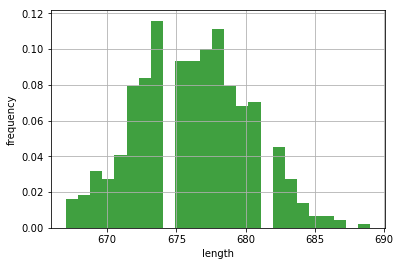

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('length')
plt.ylabel('frequency')
plt.grid(True)


n, bins, patches = plt.hist(p1,25, normed=1, facecolor='green', alpha=0.75)



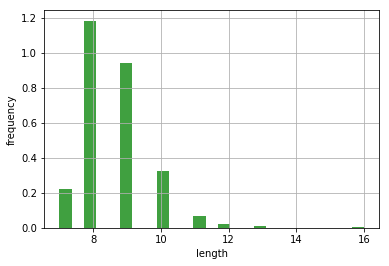

In [8]:
plt.xlabel('length')
plt.ylabel('frequency')
plt.grid(True)
n, bins, patches = plt.hist(p2,25, normed=1, facecolor='green', alpha=0.75)
